In [27]:
import sympy
from sympy import Ellipse, Point, S, Eq, latex, plot_implicit, solve
from sympy import symbols, simplify, Rational, Matrix, Line
from sympy import cos as Cos
from sympy import sin as Sin
from IPython.display import Latex

# Практическое занятие 15, Демченко Георгий
# Компьютерный практикум по алгебре на Python
### Задание 1.
Построить эллипс с центром в точке А(1, 2), полуосями 3 и 2. Вычислить и вывести на экран эксцентриситет, площадь и длину дуги полученного эллипса, центр, полуоси, periapsis, apoapsis, межфокусное расстояние и фокусы.

Указание: составить словарь с ключами - названиями ('center', 'hradius', 'vradius' и т.п.) и значениями - атрибутами эллипса (.center, .hradius, ...), затем в цикле вывести все значения атрибутов из словаря вместе с названиями, например, "hradius=3".

In [ ]:
El_1 = Ellipse(Point(1, 2), hradius = 3, vradius = 2)
dct_el_params = {"center": El_1.center,
                 "hradius": El_1.hradius,
                 "vradius": El_1.vradius,
                 "eccentricity": El_1.eccentricity,
                 "area": El_1.area,
                 "circumference": El_1.circumference,
                 "periapsis": El_1.periapsis,
                 "apoapsis": El_1.apoapsis,
                 "focus-distance": El_1.focus_distance,
                 "foci": El_1.foci}
display(*[Latex(fr"{latex(key)} = {latex(dct_el_params[key])}") for key in dct_el_params.keys()])

### Задание 2.
Вывести на экран **уравнение** эллипса из задания 1, повернутого на 30 градусов против часовой стрелки относительно его центра,  переменные $u$ и $v$.

Изобразить на общем графике эллипс и повернутый эллипс.

**Указание:** по углу определить значение _slope аргумента метода equation (это тангенс угла наклона), использовать plot_implicit.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

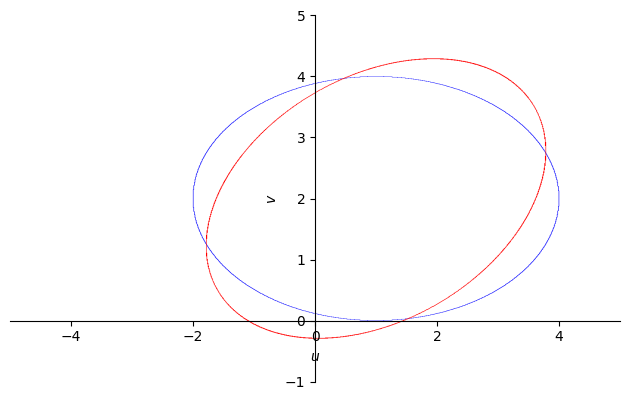

In [ ]:
u, v = sympy.symbols('u v')
expr_1 = El_1.equation(x = u, y = v)
free_coef_1 = -expr_1.subs({u : 1}).subs({v : 2})
expr_1_f = Eq(expr_1 + free_coef_1, free_coef_1)
expr_2 = sympy.simplify(El_1.equation(x = u, y = v, _slope = sympy.S(1)/sympy.sqrt(3)))
free_coef_2 = -expr_2.as_coeff_add()[0]
expr_2_f = Eq(expr_2 + free_coef_2, free_coef_2)

display(Latex(fr"\text{{Уравнение исходного эллипспа: }} {latex(expr_1_f)}"))
display(Latex(fr"\text{{Уравнение повернутого эллипса: }} {latex(expr_2_f)}"))
print()

plt = plot_implicit(expr_1_f, (u, -5, 5), (v, -1, 5), aspect_ratio = (1, 1),
                    line_color = "blue", xlabel='$u$', ylabel='$v$', show = False)
plt.append(plot_implicit(expr_2_f, (u, -5, 5), (v, -1, 5), aspect_ratio = (1, 1),
                    line_color = "red", show = False)[0])
plt.show()

### Задание 3.
Найти вершины эллипса из Задания 1.

**Указание:** вершины эллипса искать как решение системы уравнений, составленной из уравнения эллипса и уравнения прямой, проходящей через форкусы (воспользоваться Line и методом equation()); вторую пару вершин получить как решение системы из уравнения эллипса и прямой, проходящей через центр эллипса перпендикулярно прямой, проходящей через фокусы.

In [ ]:
x, y = sympy.symbols('x y')

def Find_Ellipse_Vertices(El_cur):
  ellipse_eq = El_cur.equation(x = x, y = y)
  f_point_1, f_point_2 = El_cur.foci
  focus_line = Line(f_point_1, f_point_2)
  focus_line_eq = focus_line.equation(x = x, y = y)
  smal_diag_eq = focus_line.perpendicular_line(El_cur.center).equation(x = x, y = y)
  lst_el_vert = [dot_cur for eq_cur in [focus_line_eq, smal_diag_eq] for dot_cur in sympy.solve([Eq(ellipse_eq, 0), Eq(eq_cur, 0)], (x, y), domain = S.Reals)]
  return lst_el_vert

lst_el_3_dots = Find_Ellipse_Vertices(El_1)
display(Latex(fr"\text{{Вершины Эллипса:}}"))
display(*[Latex(f"[{i + 1}]. {latex(lst_el_3_dots[i])}") for i in range(len(lst_el_3_dots))])

### Задание 4.
Провести касательные к эллипсу из Задания 1 через его вершины.

Указание: использовать equation прямых Line, plot_implicit. Для корректного изображения на графике горизонтальных прямых в plot_implicit указывать диапазоны значений и переменной $x$ и переменной $y$.

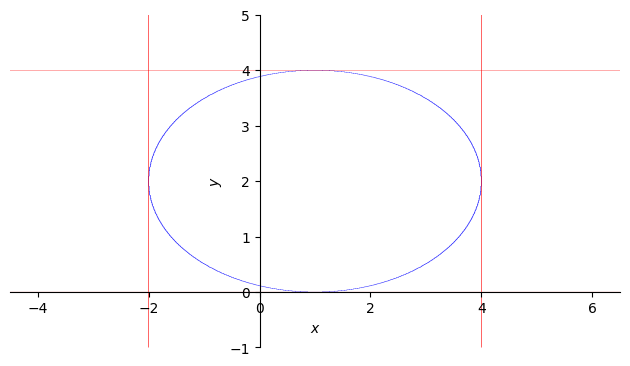

In [ ]:
big_diag = Line(El_1.foci[0], El_1.foci[1])
smal_diag = big_diag .perpendicular_line(El_1.center)
lst_tangent_eq = [big_diag.perpendicular_line(lst_el_3_dots[i]).equation(x = x, y = y) if i < 2 else smal_diag.perpendicular_line(lst_el_3_dots[i]).equation(x = x, y = y)  for i in range(len(lst_el_3_dots))]

plt_4 = plot_implicit(El_1.equation(x = x, y = y), (x, -4.5, 6.5), (y, -1, 5), aspect_ratio = (1, 1),
                    line_color = "blue", xlabel='$x$', ylabel='$y$', show = False)
for eq in lst_tangent_eq:
  plt_4.append(plot_implicit(Eq(eq, 0), (x, -4.5, 6.5), (y, -1, 5), aspect_ratio = (1, 1),
                line_color = "red", show = False)[0])
plt_4.show()

### Задание 5**.
Построить дочерний класс эллипсов Ellipse_rot, в этом классе должна быть переменная угол поворота, по умолчанию 0 и матрица поворота rot_matr__, по умолчанию None. По умолчанию центр эллипса в начале координат, но при построении экземпляра пользователь может задать другой центр. При построении экземпляра класса пользователь должен иметь возможность задать угол поворота. Матрица поворота - внутренняя переменная, она должна изменяться только при вызове метода change_angle, изменяющего угол поворота.

**Атрибуты класса:**

**focus_distance** фокусное расстояние $c = \sqrt{a^2 - b^2}$

**foci фокусы** в виде кортежа из точек Point

**angle** угол наклона в радианах

**slope** тангенс угла наклона (None для угла, кратного $\pi / 2$, угол от $- 2 \pi$ до $2 \pi$)

**rot_matr** (не путать с rot_matr__!!!) - матрица поворота $\left(\begin{matrix}\cos\alpha&-\sin\alpha\\ \sin\alpha&\cos\alpha\end{matrix}\right).$


**Методы:**

**change_angle** аргумент - новое значение угла поворота, метод изменяет переменную angle и матрицу поворота

**equation** возвращает уравнение эллипса, соответствующее углу поворота эллипса, у этого метода необязательные аргументы - имена переменных, по умолчанию $x$ и $y$.


Протестировать полученный класс так: создать эллипс с осями 12 и 9, центр в точке $(-1, 2)$, угол поворота $\pi / 3$, вывести на экран его эксцентриситет, фокусное расстояние, фокусы, тангенс угла наклона, матрицу поворота и уравнение. Затем заменить угол поворота на $\pi / 4$ и вывести на экран те же атрибуты и результаты работы методов, только уравнение вывести с переменными $u$ и $v$.

In [ ]:
x, y = sympy.symbols('x y')

class Ellipse_rot(Ellipse):
  def __new__(cls, center=Point(0, 0), hradius = None, vradius = None,
              eccentricity=None, angle = 0, rot_matr__ = None, **kwargs):
    return super().__new__(cls, center, hradius, vradius, eccentricity, **kwargs)

  def __init__(self, center=Point(0, 0), hradius = None, vradius = None,
              eccentricity=None, angle = 0, rot_matr__ = None, **kwargs):
    self.change_angle(angle)

  @property
  def slope(self):
    tg_val = sympy.tan(self.angle)
    if (abs(self.angle % S(sympy.pi)) == S(sympy.pi)/2):
      tg_val = None
    return tg_val

  @property
  def focus_distance(self):
    return sympy.sqrt(self.hradius ** 2 - self.vradius ** 2)

  @property
  def rot_matr(self):
    return self.rot_matr__

  @property
  def foci(self):
    c = self.focus_distance
    alpha = self.angle
    if alpha == 0:
        return tuple([Point((c_val, 0)) for c_val in (-c, c)])
    F1, F2 = [Matrix((c_val, 0)) for c_val in (-c, c)]
    return tuple([Point(*(self.rot_matr__ * F)) for F in (F1, F2)])

  def change_angle(self, new_angle):
    self.angle = new_angle
    self.rot_matr__ = Matrix([[Cos(new_angle), -Sin(new_angle)], [Sin(new_angle), Cos(new_angle)]])

  def equation(self, x_var = x, y_var = y):
    # eq_tmp =  sympy.simplify(super().equation(x = x_var, y = y_var, _slope = self.angle))
    # free_c = -eq_tmp.as_coeff_add()[0]
    # return Eq(eq_tmp + free_c, free_c)
    return Eq(super().equation(x = x_var, y = y_var, _slope = self.angle), 0)


test_ellipse = Ellipse_rot(center = Point(-1, 2), hradius=12, vradius = 9, angle = S(sympy.pi)/3)
display(Latex(fr"\text{{[1]. Параметры изначального эллипса:}}"))
display(Latex(f"eccentricity: {latex(test_ellipse.eccentricity)}"))
display(Latex(f"focus-distance: {latex(test_ellipse.focus_distance)} "))
display(Latex(f"foci : {latex(test_ellipse.foci)} "))
display(Latex(f"Tangent\  of \  the\  angle\  of\  inclination: {latex(test_ellipse.slope)} "))
display(Latex(f"Rotation\ matrix: {latex(test_ellipse.rot_matr)} "))
display(Latex(f"Equation : {latex(test_ellipse.equation())} "))
test_ellipse.change_angle(S(sympy.pi)/4)
print()
display(Latex(fr"\text{{[2]. Параметры эллипса после изменения угла:}}"))
display(Latex(f"eccentricity: {latex(test_ellipse.eccentricity)}"))
display(Latex(f"focus-distance: {latex(test_ellipse.focus_distance)} "))
display(Latex(f"foci : {latex(test_ellipse.foci)} "))
display(Latex(f"Tangent\  of \  the\  angle\  of\  inclination: {latex(test_ellipse.slope)} "))
display(Latex(f"Rotation\ matrix: {latex(test_ellipse.rot_matr)} "))
display(Latex(f"Equation : {latex(test_ellipse.equation())} "))

###  Индивидуальное задание
Эллипс с центром $A$, вертикальной полуосью $b$ и эксцентриситетом $\varepsilon$.
Изобразить на графике эллипс, а также эллипс, повернутый на угол $\alpha$ градусов против часовой стрелки.

Вывести на экран центр и фокусы эллипса, длины полуосей, уравнение эллипса, вершины эллипса.

Вариант №43

Центр $\operatorname{Point2D}\left(1, 1\right)$, вертикальная полуось $2$, эксцентриситет $1 / 3$, угол поворота $\pi / 6$, по часовой стрелке.

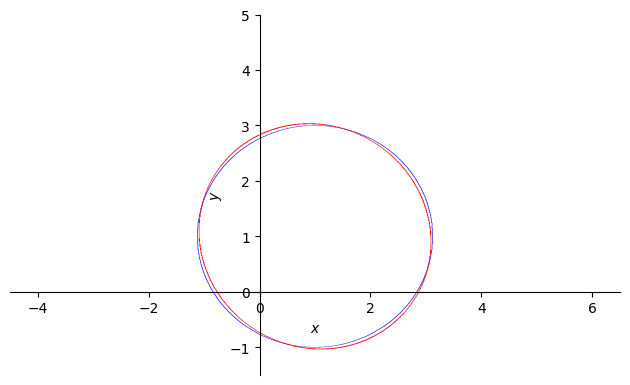

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
def Get_Ellipse_Data(El_cur):
  dct_el_params = {"center": El_cur.center,
                 "hradius": El_cur.hradius,
                 "vradius": El_cur.vradius,
                 "eccentricity": El_cur.eccentricity,
                 "area": El_cur.area,
                 "circumference": El_cur.circumference,
                 "periapsis": El_cur.periapsis,
                 "apoapsis": El_cur.apoapsis,
                 "focus\_distance": El_cur.focus_distance,
                 "foci": El_cur.foci}
  El_cur_eq = El_cur.equation(x = x, y= y)
  El_cur_free_c = -El_cur_eq.as_coeff_add()[0]
  dct_el_params["equation"] = Eq(El_cur_eq + El_cur_free_c, El_cur_free_c)
  dct_el_params["vertices"] = Find_Ellipse_Vertices(El_cur)
  return dct_el_params

Center_ind_p = Point(1, 1)
El_ind = Ellipse(Point(1, 1), vradius= 2, eccentricity = Rational(1, 3))
dct_el_ind_data = Get_Ellipse_Data(El_ind)
El_ind_rotation_eq = sympy.simplify(El_ind.equation(x = x,y = y, _slope = -sympy.S(1)/sympy.sqrt(3)))

plt_ind = plot_implicit(dct_el_ind_data["equation"], (x, -4.5, 6.5), (y, -1.5, 5), aspect_ratio = (1, 1),
                    line_color = "blue", xlabel='$x$', ylabel='$y$', show = False)
plt_ind.append(plot_implicit(El_ind_rotation_eq, (x, -4.5, 6.5), (y, -1.5, 5), aspect_ratio = (1, 1),
                    line_color = "red", show = False)[0])
plt_ind.show()

display(Latex(fr"\text{{Параметры Эллипса:}}"))
display(*[Latex(fr"{latex(key)} : {latex(dct_el_ind_data[key])}") for key in ["center", "foci", "hradius", "vradius", "equation", "vertices"]])